<img src="image/Group.png" alt="logo">

---

# **Spogliatoio** | Python: Data on national teams around the world since 1993

Caderno de **Códigos**<br> 
Desenvolvedor [Enzo Schitini](https://enzo-schitini.bubbleapps.io/version-test/)

---

### **`Tópicos`**

<ol type="1">
  <li>Introdução ao material</li>
  <li>Criação dos dados</li>
  <li>Análise exploratória</li>
  <li>Algoritmo</li>
  <li>Storytelling</li>
</ol>

> Os dados foram fornecidos pelo Kaggle
---

## 1\. `Introdução ao material`

#### 1.1\. `.`

#### 1.2\. `Importando as funções`

In [156]:
from functools import reduce
import time
from time import sleep
import matplotlib
import pandas as pd

from adige import ArquivoCSV
from adige import valore_abbreviato

## 2\. `Outros arquivos`

## 3\. `Análise exploratória`

<img src="image/9940.png" alt="logo">

---

#### 3.1\. `As colunas`

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |

In [157]:
data = './base.csv'

In [158]:
df = pd.read_csv(data)

In [159]:
df.head(n=5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,SouthAmerica,SouthAmerica,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,SouthAmerica,NorthAmerica,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,SouthAmerica,SouthAmerica,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,SierraLeone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,SouthAmerica,SouthAmerica,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
csv = ArquivoCSV(data)
torneo = list(set(csv.extrair_coluna(11)))
nazionali = list(set(csv.extrair_coluna(1)))

In [161]:
print(f'Torneo: {len(torneo)}')

Torneo: 82


In [162]:
print(f'Ci sono {len(nazionali)} nazionali.')

Ci sono 211 nazionali.


#### 3.2\. `Estrutura`

In [163]:
line, colonne = df.shape

print(f'O arquivo {data} tem:')
print(f'{valore_abbreviato(str(line))} linhas.')
print(f'{valore_abbreviato(str(colonne))} colunas.')

O arquivo ./base.csv tem:
23.921 linhas.
25 colunas.


## 4\. `Algoritmo`

In [164]:
paese_da_cercare = 'Italy'

In [165]:
df_paese_totale = df[(df['home_team'] == paese_da_cercare) | (df['away_team'] == paese_da_cercare)]

In [166]:
print(f'Totale di partite: {valore_abbreviato(str(len(df_paese_totale)))}')

Totale di partite: 351


#### `Classe prestazioni della squadra (POO)`

- Struttura

In [167]:
class Prestazioni(object):

    import pandas as pd
    from adige import valore_abbreviato

    def __init__(self, paese: str, data) -> None:
        self.paese = paese
        self.data = data
    
    def generale(self):
        df_paese_totale = self.data[(self.data['home_team'] == self.paese) | (self.data['away_team'] == self.paese)]
        totale = valore_abbreviato(str(len(df_paese_totale)))
        return totale
    
    def vittorie(self):
        
        def calcoli(posto, score1, score2):
            df_goal = self.data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
            totale_di_partite = df_goal[df_goal[posto] == self.paese]
            vittorie = df_goal[(df_goal[posto] == self.paese) & (self.data[score1] > self.data[score2])]

            vittorie = valore_abbreviato(str(len(vittorie)))

            # Proporzione
            proporzione = round((float(vittorie) / len(totale_di_partite)) * 100, 2)
            return len(totale_di_partite), vittorie, proporzione
        
        partite_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[0]
        vittorie_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[1]
        proporzione_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[2]

        partite_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[0]
        vittorie_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[1]
        proporzione_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[2]

        return partite_dentro_casa, vittorie_dentro_casa, proporzione_dentro_casa, partite_fuori_casa, vittorie_fuori_casa, proporzione_fuori_casa
    
    def pareggi(self):
        
        def calcoli(posto, score1, score2):
            df_goal = self.data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
            totale_di_partite = df_goal[df_goal[posto] == self.paese]
            pareggi = df_goal[(df_goal[posto] == self.paese) & (self.data[score1] == self.data[score2])]

            pareggi = valore_abbreviato(str(len(pareggi)))

            # Proporzione
            proporzione = round((float(pareggi) / len(totale_di_partite)) * 100, 2)
            return len(totale_di_partite), pareggi, proporzione
        
        partite_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[0]
        pareggi_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[1]
        proporzione_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[2]

        partite_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[0]
        pareggi_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[1]
        proporzione_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[2]

        return partite_dentro_casa, pareggi_dentro_casa, proporzione_dentro_casa, partite_fuori_casa, pareggi_fuori_casa, proporzione_fuori_casa

    def sconfitte(self):
        
        def calcoli(posto, score1, score2):
            df_goal = self.data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
            totale_di_partite = df_goal[df_goal[posto] == self.paese]
            sconfitte = df_goal[(df_goal[posto] == self.paese) & (self.data[score1] < self.data[score2])]

            sconfitte = valore_abbreviato(str(len(sconfitte)))

            # Proporzione
            proporzione = round((float(sconfitte) / len(totale_di_partite)) * 100, 2)
            return len(totale_di_partite), sconfitte, proporzione
        
        partite_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[0]
        sconfitte_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[1]
        proporzione_dentro_casa = calcoli('home_team', 'home_team_score', 'away_team_score')[2]

        partite_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[0]
        sconfitte_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[1]
        proporzione_fuori_casa = calcoli('away_team', 'away_team_score', 'home_team_score')[2]

        return partite_dentro_casa, sconfitte_dentro_casa, proporzione_dentro_casa, partite_fuori_casa, sconfitte_fuori_casa, proporzione_fuori_casa

italia = Prestazioni(paese_da_cercare, df)
print(f'{italia.paese} ha avuto {italia.generale()} partite.')

Italy ha avuto 351 partite.


In [168]:
# Dentro casa
print(f'{italia.vittorie()[0]} partite, {italia.vittorie()[1]} vittorie e {italia.vittorie()[2]}% di prestazione -- Dentro casa --')
# Fuori casa
print(f'{italia.vittorie()[3]} partite, {italia.vittorie()[4]} vittorie e {italia.vittorie()[5]}% di prestazione -- Fuori casa --')

199 partite, 117 vittorie e 58.79% di prestazione -- Dentro casa --
152 partite, 71 vittorie e 46.71% di prestazione -- Fuori casa --


In [169]:
# Dentro casa
print(f'{italia.pareggi()[0]} partite, {italia.pareggi()[1]} pareggi e {italia.pareggi()[2]}% di prestazione -- Dentro casa --')
# Fuori casa
print(f'{italia.pareggi()[3]} partite, {italia.pareggi()[4]} pareggi e {italia.pareggi()[5]}% di prestazione -- Fuori casa --')

199 partite, 55 pareggi e 27.64% di prestazione -- Dentro casa --
152 partite, 48 pareggi e 31.58% di prestazione -- Fuori casa --


In [170]:
# Dentro casa
print(f'{italia.sconfitte()[0]} partite, {italia.sconfitte()[1]} sconfitte e {italia.sconfitte()[2]}% di prestazione -- Dentro casa --')
# Fuori casa
print(f'{italia.sconfitte()[3]} partite, {italia.sconfitte()[4]} sconfitte e {italia.sconfitte()[5]}% di prestazione -- Fuori casa --')

199 partite, 27 sconfitte e 13.57% di prestazione -- Dentro casa --
152 partite, 33 sconfitte e 21.71% di prestazione -- Fuori casa --


In [171]:
def comportamento_in_un_torneo(paese, torneo:str):
    torneo_df = df[df['tournament'] == torneo]
    italia = Prestazioni(paese_da_cercare, torneo_df)
    print(f'{paese} nel torneo {torneo.upper()} ha avuto {italia.generale()} partite:')
    print('---------------------------------------------------------------')

    print(f'{italia.vittorie()[0]} partite, {italia.vittorie()[1]} vittorie e {italia.vittorie()[2]}% di prestazione -- Dentro casa')
    print(f'{italia.vittorie()[3]} partite, {italia.vittorie()[4]} vittorie e {italia.vittorie()[5]}% di prestazione -- Fuori casa\n')

    print(f'{italia.pareggi()[0]} partite, {italia.pareggi()[1]} pareggi e {italia.pareggi()[2]}% di prestazione -- Dentro casa')
    print(f'{italia.pareggi()[3]} partite, {italia.pareggi()[4]} pareggi e {italia.pareggi()[5]}% di prestazione -- Fuori casa\n')

    print(f'{italia.sconfitte()[0]} partite, {italia.sconfitte()[1]} sconfitte e {italia.sconfitte()[2]}% di prestazione -- Dentro casa')
    print(f'{italia.sconfitte()[3]} partite, {italia.sconfitte()[4]} sconfitte e {italia.sconfitte()[5]}% di prestazione -- Fuori casa')

# FIFAWorldCup Friendly CONCACAFNationsLeague UEFAEuroqualification FIFAWorldCupqualification CopaAmérica UEFAEuro
paese_da_cercare = 'Italy'
try:
    comportamento_in_un_torneo(paese_da_cercare, 'UEFAEuro')
except:
    print('\nATTENZIONE!')
    print(f'Mi sa che {paese_da_cercare} non ha mai partecipato a questo torneo.')

Italy nel torneo UEFAEURO ha avuto 34 partite:
---------------------------------------------------------------
17 partite, 11 vittorie e 64.71% di prestazione -- Dentro casa
17 partite, 6 vittorie e 35.29% di prestazione -- Fuori casa

17 partite, 5 pareggi e 29.41% di prestazione -- Dentro casa
17 partite, 7 pareggi e 41.18% di prestazione -- Fuori casa

17 partite, 1 sconfitte e 5.88% di prestazione -- Dentro casa
17 partite, 4 sconfitte e 23.53% di prestazione -- Fuori casa


#### `Vittorie e sconfitte`

### A casa

- Le vittorie

In [172]:
def calcolare_le_vittorie(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_a_casa = df_goal[df_goal['home_team'] == paese]
    df_paese_vittorie_in_casa = df_goal[(df_goal['home_team'] == paese) & (data['home_team_score'] > data['away_team_score'])]
    
    # Proporzione
    proporzione = round((len(df_paese_vittorie_in_casa) / len(totale_di_partite_a_casa)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_vittorie_in_casa)))} vittorie a casa su {valore_abbreviato(str(len(totale_di_partite_a_casa)))} partite giocate. {proporzione}%')

    return df_paese_vittorie_in_casa

#vittorie = calcolare_le_vittorie()
#vittorie.head(n=25)

- Le sconfitte

In [173]:
def calcolare_le_sconfitte(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_a_casa = df_goal[df_goal['home_team'] == paese]
    df_paese_sconfitte_in_casa = df_goal[(df_goal['home_team'] == paese) & (data['home_team_score'] < data['away_team_score'])]

    # Proporzione
    proporzione = round((len(df_paese_sconfitte_in_casa) / len(totale_di_partite_a_casa)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_sconfitte_in_casa)))} sconfitte a casa su {valore_abbreviato(str(len(totale_di_partite_a_casa)))} partite giocate. {proporzione}%')

    return df_paese_sconfitte_in_casa

#sconfitte = calcolare_le_sconfitte()
#sconfitte.head(n=25)

- Pareggi

In [174]:
def calcolare_le_pareggi(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_a_casa = df_goal[df_goal['home_team'] == paese]
    df_paese_pareggi_in_casa = df_goal[(df_goal['home_team'] == paese) & (data['home_team_score'] == data['away_team_score'])]

    # Proporzione
    proporzione = round((len(df_paese_pareggi_in_casa) / len(totale_di_partite_a_casa)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_pareggi_in_casa)))} pareggi a casa su {valore_abbreviato(str(len(totale_di_partite_a_casa)))} partite giocate. {proporzione}%')

    return df_paese_pareggi_in_casa

#pareggi = calcolare_le_pareggi()
#pareggi.head(n=25)

In [175]:
vittorie = calcolare_le_vittorie(paese_da_cercare, df)
sconfitte = calcolare_le_sconfitte(paese_da_cercare, df)
pareggi = calcolare_le_pareggi(paese_da_cercare, df)

ITALY ha avuto: 117 vittorie a casa su 199 partite giocate. 58.79%
ITALY ha avuto: 27 sconfitte a casa su 199 partite giocate. 13.57%
ITALY ha avuto: 55 pareggi a casa su 199 partite giocate. 27.64%


### Fuori casa

- Le vittoria

In [176]:
def calcolare_le_vittorie_fuori(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_fuori = df_goal[df_goal['away_team'] == paese]
    df_paese_vittorie_fuori = df_goal[(df_goal['away_team'] == paese) & (data['away_team_score'] > data['home_team_score'])]
    
    # Proporzione
    proporzione = round((len(df_paese_vittorie_fuori) / len(totale_di_partite_fuori)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_vittorie_fuori)))} vittorie fuori casa su {valore_abbreviato(str(len(totale_di_partite_fuori)))} partite giocate. {proporzione}%')

    return df_paese_vittorie_fuori

vittorie_fuori = calcolare_le_vittorie_fuori(paese_da_cercare, df)
#vittorie_fuori.head(n=25)

ITALY ha avuto: 71 vittorie fuori casa su 152 partite giocate. 46.71%


- Le sconfitte

In [177]:
def calcolare_le_sconfitte_fuori(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_fuori = df_goal[df_goal['away_team'] == paese]
    df_paese_sconfitte_fuori = df_goal[(df_goal['away_team'] == paese) & (data['away_team_score'] < data['home_team_score'])]

    # Proporzione
    proporzione = round((len(df_paese_sconfitte_fuori) / len(totale_di_partite_fuori)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_sconfitte_fuori)))} sconfitte fuori casa su {valore_abbreviato(str(len(totale_di_partite_fuori)))} partite giocate. {proporzione}%')

    return df_paese_sconfitte_fuori

sconfitte_fuori = calcolare_le_sconfitte_fuori(paese_da_cercare, df)
#sconfitte_fuori.head(n=25)

ITALY ha avuto: 33 sconfitte fuori casa su 152 partite giocate. 21.71%


- I pareggi

In [178]:
def calcolare_le_pareggi_fuori(paese, data):
    df_goal = data[['home_team', 'away_team', 'home_team_score', 'away_team_score', 'tournament']]
    totale_di_partite_fuori = df_goal[df_goal['away_team'] == paese]
    df_paese_pareggi_fuori = df_goal[(df_goal['away_team'] == paese) & (data['home_team_score'] == data['away_team_score'])]

    # Proporzione
    proporzione = round((len(df_paese_pareggi_fuori) / len(totale_di_partite_fuori)) * 100, 2)
    print(f'{paese.upper()} ha avuto: {valore_abbreviato(str(len(df_paese_pareggi_fuori)))} pareggi fuori casa su {valore_abbreviato(str(len(totale_di_partite_fuori)))} partite giocate. {proporzione}%')

    return df_paese_pareggi_fuori

pareggi = calcolare_le_pareggi_fuori(paese_da_cercare, df)
#pareggi.head(n=25)

ITALY ha avuto: 48 pareggi fuori casa su 152 partite giocate. 31.58%


In [179]:
vittorie_a_casa = calcolare_le_vittorie(paese_da_cercare, df)
sconfitte_a_casa = calcolare_le_sconfitte(paese_da_cercare, df)
pareggi_a_casa = calcolare_le_pareggi(paese_da_cercare, df)

ITALY ha avuto: 117 vittorie a casa su 199 partite giocate. 58.79%
ITALY ha avuto: 27 sconfitte a casa su 199 partite giocate. 13.57%
ITALY ha avuto: 55 pareggi a casa su 199 partite giocate. 27.64%


In [180]:
vittorie_fuori_casa = calcolare_le_vittorie_fuori(paese_da_cercare, df)
sconfitte_fuori_casa = calcolare_le_sconfitte_fuori(paese_da_cercare, df)
pareggi_fuori_casa = calcolare_le_pareggi_fuori(paese_da_cercare, df)

ITALY ha avuto: 71 vittorie fuori casa su 152 partite giocate. 46.71%
ITALY ha avuto: 33 sconfitte fuori casa su 152 partite giocate. 21.71%
ITALY ha avuto: 48 pareggi fuori casa su 152 partite giocate. 31.58%


In [181]:
def comportamento_in_un_torneo(paese, torneo:str):
    torneo_df = df[df['tournament'] == torneo]
    print(f'{paese} nel torneo {torneo.upper()}:')
    print('-------------------------------------------------------------------------')

    calcolare_le_vittorie(paese_da_cercare, torneo_df)
    calcolare_le_sconfitte(paese_da_cercare, torneo_df)
    calcolare_le_pareggi(paese_da_cercare, torneo_df)
    print('-------------------------------------------------------------------------')
    calcolare_le_vittorie_fuori(paese_da_cercare, torneo_df)
    calcolare_le_sconfitte_fuori(paese_da_cercare, torneo_df)
    calcolare_le_pareggi_fuori(paese_da_cercare, torneo_df)
    print('\n')

# FIFAWorldCup Friendly CONCACAFNationsLeague UEFAEuroqualification FIFAWorldCupqualification CopaAmérica UEFAEuro

try:
    comportamento_in_un_torneo(paese_da_cercare, 'FIFAWorldCupqualification')
except:
    print('\nATTENZIONE!')
    print(f'Mi sa che {paese_da_cercare} non ha mai partecipato a questo torneo.')

Italy nel torneo FIFAWORLDCUPQUALIFICATION:
-------------------------------------------------------------------------
ITALY ha avuto: 28 vittorie a casa su 37 partite giocate. 75.68%
ITALY ha avuto: 1 sconfitte a casa su 37 partite giocate. 2.7%
ITALY ha avuto: 8 pareggi a casa su 37 partite giocate. 21.62%
-------------------------------------------------------------------------
ITALY ha avuto: 18 vittorie fuori casa su 35 partite giocate. 51.43%
ITALY ha avuto: 3 sconfitte fuori casa su 35 partite giocate. 8.57%
ITALY ha avuto: 14 pareggi fuori casa su 35 partite giocate. 40.0%




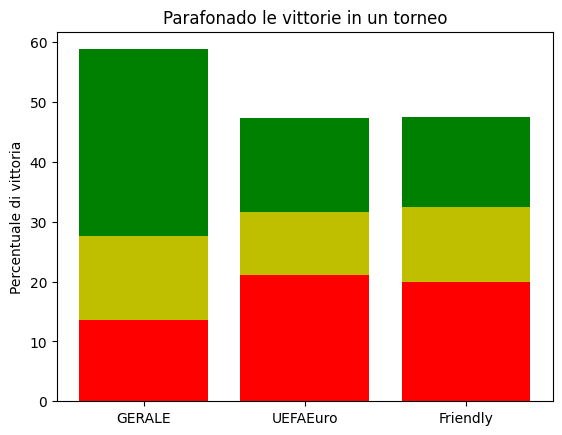

In [182]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = ['GERALE', 'UEFAEuro', 'Friendly'] # Pareamento entre índice de satisfação (x) e número de clientes (y)
y1 = [58.79, 47.37, 47.5] # Vittorie

x2 = ['GERALE', 'UEFAEuro', 'Friendly'] # Pareamento entre índice de satisfação (x) e número de clientes (y)
y2 = [27.64, 31.58, 32.5] # Pareggi

x3 = ['GERALE', 'UEFAEuro', 'Friendly']
y3 = [13.57, 21.05, 20.0] # Sconfitte

# Mais cores: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Vittorie", color='g')
plt.bar(x2, y2, label="Pareggi", color='y')
plt.bar(x3, y3, label="Sconfitte", color='r')
plt.plot()
        
plt.ylabel("Percentuale di vittoria")
plt.title("Parafonado le vittorie in un torneo")
#plt.legend()
plt.show()